In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore") 
cancer= pd.read_csv("haberman.csv")


#The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
'''Survival status (class attribute):
1 = the patient survived 5 years or longer
2 = the patient died within 5 year'''



# Questions on Dataset.(15 questions)

In [8]:
#1. How many datapoint and features?
print (cancer.shape)

(306, 4)


We have 306 datapoints and 4 features including class label i.e status are present in dataset.

In [9]:
#2. Which are the features present in dataset?
print(cancer.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


age ,year and nodes are 3 names of features and a class label status is also present.

In [10]:
#3. How many data points for each class are present? 
cancer["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

So we have 225 patients who survived 5 years or longer after surgery and they are labelled as 1.
and we have 81 patients who died within 5 years after surgery and they are labelled as 2.
Since it is related to breast cancer so we can conclude all patients are women.
This is an imbalanced dataset


In [11]:
#4.What are number of people in different age?
g=cancer.groupby('age').size()
g.count()

49

There are 49 different ages present in dataset

In [12]:
#5.What is the minimum age of person who had undergone surgery in this dataset?
mini=cancer.age.min()
mini


30

So the min age of person during surgery was 30 years.

In [13]:
#6.What is the maximum age of person who had undergone surgery in this dataset?
maxi=cancer.age.max()
maxi

83

So the max age of person during surgery was 83 years.

In [16]:
#7.What is the number of people who underwent surgery below 40 years of age?
k=cancer[cancer.age<40]
k.age.count()

40

So 40 women underwent surgery who are below 40 years of age

In [17]:
#8.total number of people who are above 60 years who survived more than 5 years after surgery?
p=cancer[cancer.status==1]
k=p[p.age>60]
k.age.count()

55

So only 55 senior citizens(60+ age) survived after surgery for more than five years

In [18]:
#9.total number of people who are above 30(inclusive) years but below 55(inclusive) who died within  5 years after surgery?
p=cancer[cancer.status==2]
j=p.loc[(p['age']>=30) & (p['age']<=55)]
j.age.count()

51

So 51 young citizens died  within 5 years after surgery

In [19]:
#10.number of people whose axillary nodes were not affected(nodes=0) due to cancer?
k=cancer[cancer.nodes==0]
k.nodes.count()

136

So for 136 patients cancer did not spread or affect the axillary nodes

11.What is number of women affected with Micrometastases or cancerous cells are present in 1 to 3 axillary lymph nodes, or the internal mammary nodes have tiny amounts of cancerous cells?

In [39]:
j=p.loc[(p['nodes']>=1) & (p['nodes']<=3)]
j.nodes.count()

20

So 20 women were affected with Micrometastases or cancerous cells are present in 1 to 3 axillary lymph nodes

Q 12.What is the number of women who had  4 to 9 axillary lymph nodes have cancer present, or the internal mammary nodes have cancer and have died within 5 years of surgery?

In [40]:
pl=cancer[cancer.status==2]
j=pl.loc[(pl['nodes']>=4) & (pl['nodes']<=9)]
j.nodes.count()

18

So 18 women had  4 to 9 axillary lymph nodes have cancer present, or the internal mammary nodes have cancer and have died within 5 years of surgery

Q 13.What is he number of women affected with cancer has been found in 10 or more axillary lymph nodes and has survived more than 5 years after surgery?

In [41]:
pl=cancer[cancer.status==1]
j=pl.loc[(pl['nodes']>=10)]
j.nodes.count()

19

So 19 women affected with cancer has been found in 10 or more axillary lymph nodes and has survived more than 5 years after surgery.

Q.14 What is he number of women affected with cancer has been found in 10 or more axillary lymph nodes and have died within 5 years after surgery?

In [42]:
pl=cancer[cancer.status==2]
j=pl.loc[(pl['nodes']>=10)]
j.nodes.count()

24

So 24 women affected with cancer has been found in 10 or more axillary lymph nodes and have died within 5 years after surgery.

Q.15 What is the average age of women who had undergone surgery and belong to both statuses?


In [43]:
pl=cancer[cancer.status==1]
x=pl.age.mean()
x

52.01777777777778

In [44]:
pl=cancer[cancer.status==2]
y=pl.age.mean()
y

53.67901234567901

So most of the women were in their 50's(age) during surgery.


# BI VARIATE ANALYSIS:


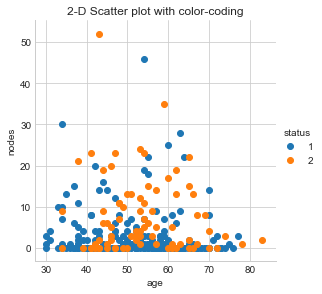

In [43]:
# 2-D Scatter plot with color-coding.
sns.set_style("whitegrid");
sns.FacetGrid(cancer, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2-D Scatter plot with color-coding")
plt.show();

Observations:
1.The features are non linearly separable
2.Only 2 people who had 30 and above nodes survived after five years of surgery
3.The number of people who survived more than 5 years of surgery are more as compared to patients who died within 5 years of surgery given that the number of nodes is less than 10.

                          pair plots between features


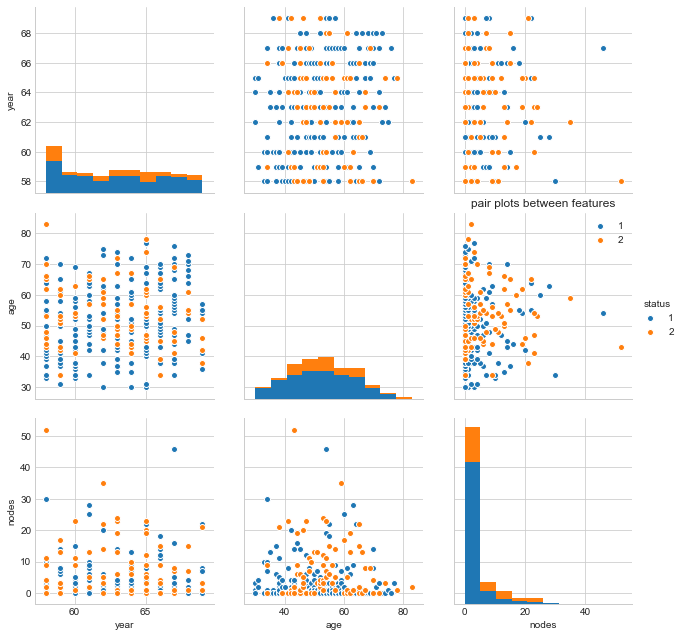

In [51]:
#Pair plots of all features:
print('                          pair plots between features')
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer,hue="status",vars=['year','age','nodes'],  size=3);
plt.title("pair plots between features")
plt.legend()
plt.show()

OBSERVATION:
1.From node and year pair plot we can conclude, more number of people died within 5 years of surgery who were operated in year 1962-1965
2.Less number of patients with age less than 40 died within five years as compared to who died within 5 years of surgery
3.The multivariate or pair plot between features-"nodes" and "year" are well scattered and there are less number of overlaps as compared to other scatter plots.
4.Hence these 2 features i.e "nodes" & "year" can be used for classification.


# UNI VARIATE ANALYSIS:


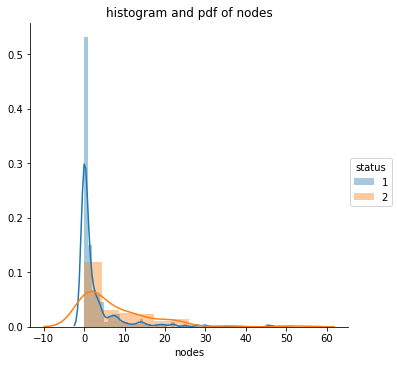

In [2]:
#histogram and pdf of nodes
sns.FacetGrid(cancer, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("histogram and pdf of nodes")
plt.show();

Observation:
1.The frequency of patients who survived after 5 years of surgery is around 55% and have nodes less than 5.
2.Around 12% people died within 5 years of surgery and have number of nodes less than 5.

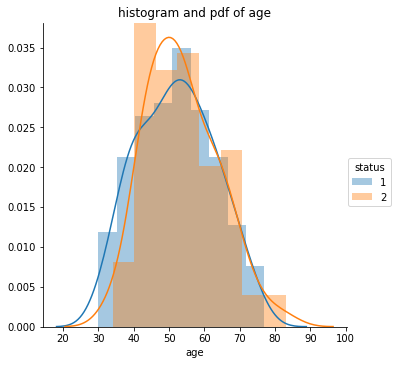

In [3]:
#histogram and pdf of age
sns.FacetGrid(cancer, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("histogram and pdf of age")
plt.show();

Observation:
1.More number of people who died within 5 yers of surgery i.e around 3.8% people died, were in age group 40-45.
2.More number of people who survived after 5 yers of surgery i.e around 3.5% people survived, were in age group 51-55.
3.Least number of people who died within 5 yers of surgery i.e around 0.4% people died, were in age group 71-83.
4.Least number of people who survived after 5 yers of surgery i.e around 0.8% people survived, were in age group 71-77.

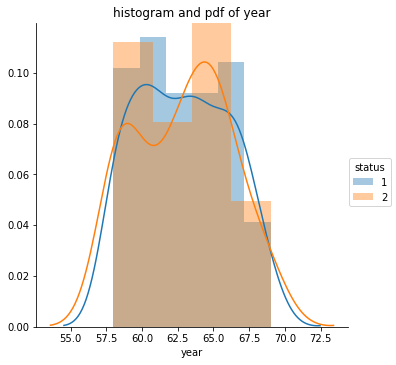

In [4]:
#Histogram and pdf of year:
sns.FacetGrid(cancer, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("histogram and pdf of year")
plt.show();

Observation:
1.As compared to other years, the more number of patients who survived after 5 years of surgery i.e around 11.3% patients had done their operation in year range 1960-1962.
2.As compared to other years, the more number of patients who died within 5 years of surgery i.e around 12% patients had done their operation in year range 1963-1966.
3.As compared to other years, the least number of patients who survived after 5 years of surgery i.e around 4.1% patients had done their operation in year range 1967-1969.
4.As compared to other years, the least number of patients who died within 5 years of surgery i.e around 5% patients had done their operation in year range 1966-1969.

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


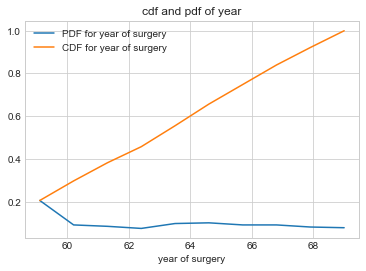

In [36]:
# pdf and cdf for year of surgery:
counts, bin_edges = np.histogram(cancer['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for year of surgery', 'CDF for year of surgery'])
plt.title("cdf and pdf of year")
plt.xlabel("year of surgery")
plt.show();

OBERVATION:
1.25% of patients had done their surgery by year 1960.
2.50% of patients had done their surgery within 1958-1963.
3.75% of patients had done their surgery by year 1965.
4.All patients had done their surgery by year 1969

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


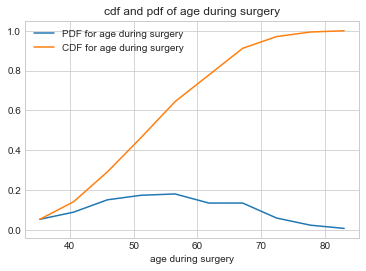

In [37]:
#pdf and cdf for age during surgery:
counts, bin_edges = np.histogram(cancer['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for age during surgery', 'CDF for age during surgery'])
plt.title("cdf and pdf of age during surgery")
plt.xlabel("age during surgery")
plt.show()


Observation:
1.The age group that had surgery was in range 30-90 years.
2.Around 15% of patients belong to age group 50-60 years.
3.50% patients underwent surgery less than or equal to 55 years of age.
4.Around 80% of patients are less than 65 years when they had surgery.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


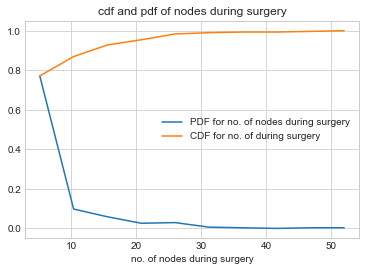

In [38]:
#pdf and cdf for no. of nodes:
counts, bin_edges = np.histogram(cancer['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['PDF for no. of nodes during surgery', 'CDF for no. of during surgery'])
plt.title("cdf and pdf of nodes during surgery")
plt.xlabel("no. of nodes during surgery")
plt.show()

Observation:
1.All patients have less than 55 nodes.
2.Around 20% of patients have greater than 10 nodes.
3.Around 78% of patients have less than 5 nodes.

In [21]:
#Mean, Variance, Standard Deviation,  
print("Means:")
print(np.mean(cancer["year"]))
print(np.mean(cancer["age"]))
print(np.mean(cancer["nodes"]))
print("**********************")
print("Variances:")
print(np.var(cancer["year"]))
print(np.var(cancer["age"]))
print(np.var(cancer["nodes"]))
print("**********************")
print("Standard Deviation:");
print(np.std(cancer["year"]))
print(np.std(cancer["age"]))
print(np.std(cancer["nodes"]))

Means:
62.85294117647059
52.45751633986928
4.026143790849673
**********************
Variances:
10.524125336409075
116.33316245888332
51.52219231919361
**********************
Standard Deviation:
3.244090833563246
10.78578520363183
7.177896092811152


Observation:
1.Most of the patients had the surgery between year 1962-1963
2.Most of the patients were in their 50's during surgery.
3.Most of the patients had 4 to 5 nodes

In [22]:
#Median, Quantiles, Percentiles.
print("Medians:")
print(np.median(cancer["year"]))
print(np.median(cancer["age"]))
print(np.median(cancer["nodes"]))


print("\nQuantiles:")
print(np.percentile(cancer["year"],np.arange(0, 100, 25)))
print(np.percentile(cancer["age"],np.arange(0, 100, 25)))
print(np.percentile(cancer["nodes"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(cancer["year"],90))
print(np.percentile(cancer["age"],90))
print(np.percentile(cancer["nodes"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(cancer["year"]))
print(robust.mad(cancer["age"]))
print(robust.mad(cancer["nodes"]))

Medians:
63.0
52.0
1.0

Quantiles:
[58.   60.   63.   65.75]
[30.   44.   52.   60.75]
[0. 0. 1. 4.]

90th Percentiles:
67.0
67.0
13.0

Median Absolute Deviation
4.447806655516806
11.860817748044816
1.482602218505602


Observation:
1.50% of patients had done their surgery  before 1963.
2.25% of patients are of age 44 or below.
3.75% of patients less than or equal to 4 nodes.
4.90% of patients did their surgery before 1967.
5.90% of paients were below 67 years of age.
6.90% of patients had less than or equal to 13 nodes. 

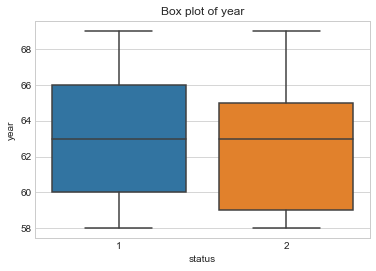

In [42]:
sns.boxplot(x='status',y='year', data=cancer)
plt.title("Box plot of year")
plt.show()

Observation:
1.People who had surgery after 1965 had a better probablity to survive after five years of surgery.
2.People who had surgery before 1960 had a greater probablity to die within five years of surgery.

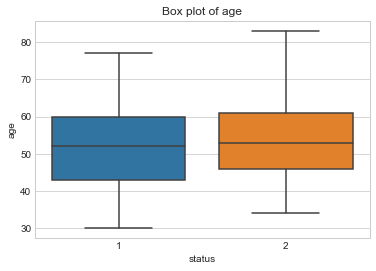

In [37]:
sns.boxplot(x='status',y='age', data=cancer)
plt.title("Box plot of age")
plt.show()

Observaion:
1.Majority of patients who were below 46 years of age during surgery survived more than 5 years.
2.Majority of patients who were above 60 years of age during surgery died within 5 years.

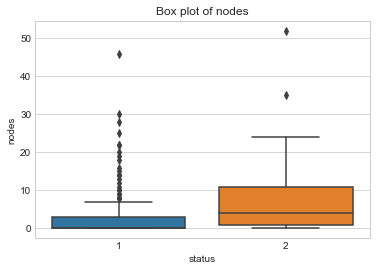

In [38]:
sns.boxplot(x='status',y='nodes', data=cancer)
plt.title("Box plot of nodes")
plt.show()

Observation:
1.The number of nodes of the patients who survived more than 5 years is high between range 0 to 5.
2.The number of nodes of the patients who died within 5 years is high around 5 onwards.

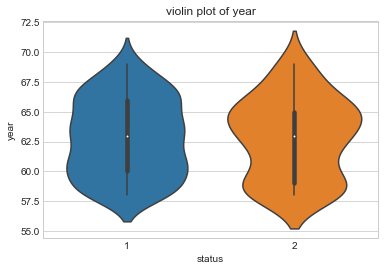

In [39]:
sns.violinplot(x="status", y="year", data=cancer, size=8)
plt.title("violin plot of year")
plt.show()

Observation:
1.Around 50% of patients had surgery before 1964.                                                      2.Patients who had their surgery done after 1965 had better chance for survival for more than 5 years.

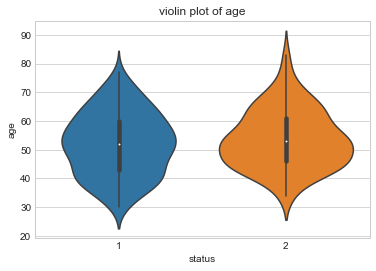

In [40]:
sns.violinplot(x="status", y="age", data=cancer, size=8)
plt.title("violin plot of age")
plt.show()

Observation:
1.50% of patients were below 50 years of age during the surgery.
2.People who were greater than 77 years during surgery died within next 5 years.

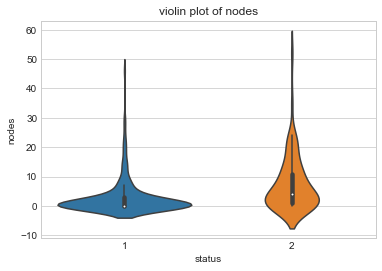

In [41]:
sns.violinplot(x="status", y="nodes", data=cancer, size=8)
plt.title("violin plot of nodes")
plt.show()

Observation:
1.Majority number of people who survived more than five years after surgery had less than 5 nodes.
2.Majority number of people who died within five years after surgery had greater than 10 nodes.

Conclusion:
1.The given dataset is imbalenced as it does not contains euqal number of data-points for each class.
2.The given dataset is not linearly seprable form each class. There are too much overlapping in the data points and hence it is  diffucult to classify.
3.Ratio of people who survived more than 5 years after surgery had less than 5 nodes.
4.Ratio of people who died within 5 years after surgery had more than 10 nodes.
5.The multivariate or pair plot between features-"nodes" and "year" are well scattered and there are less number of overlaps as compared to other scatter plots and can be used for classification.